In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random


from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *
from exponential_mechanism import *
from simpleinfotheory import *
from normalize_error_matrix import *


## Generate Synthetic Datasets

In [2]:
from alphabet import *

NUM_ATTRIBUTES = 2
NUM_STATES = [2, 2]
DATASET_SIZE = 10000

priority_dict = {'1': 1, '0': 1}

TOTAL_STATES = 1
alphabet_dict = {}
for i in range(NUM_ATTRIBUTES):
    TOTAL_STATES *= NUM_STATES[i]
    alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
ATTRIBUTE_LIST = list(alphabet_dict.keys())
# random_dist = np.array([random.randint(1, 5000) for i in range(TOTAL_STATES)])
# random_dist = random_dist/np.sum(random_dist)
# random_dist = [0.33, 0.001, 0.001, 0.001, 0.328, 0.001, 0.001, 0.007, 0.33] # [0.33, 0.001, 0.001, 0.001, 0.328, 0.001, 0.001, 0.007, 0.33]
# random_dist = [0.25, 0.25, 0.25, 0.25] # [0.5, 0.025, 0.025, 0.45]
random_dist = [0.5, 0.025, 0.45, 0.025] # Randomized_Response(STATE_COUNT=NUM_STATES[0], INPUT_ALPHABET=np.arange(NUM_STATES[0]), normalized_objective_err_matrix=[]).get_mechanism(eps=0.01)/NUM_STATES[0]
random_dist = list(np.reshape(random_dist, (-1,)))
print((random_dist))
print("Alphabet ", ALL_ALPHABET)
print("ATTRIBUTE_LIST ", ATTRIBUTE_LIST)

synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

uniform_synthetic_dataset = synthetic_dataset_constructor.gen_uniform()



[0.5, 0.025, 0.45, 0.025]
Alphabet  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
ATTRIBUTE_LIST  ['0', '1']


## Claculate Error Matrix

{'[0 0]': 0, '[0 1]': 1, '[1 0]': 2, '[1 1]': 3}


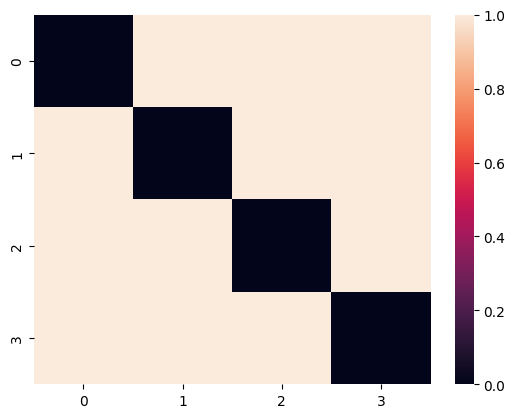

In [3]:
alphabet_dict = {}
for i in range(len(ALL_ALPHABET)):
    alphabet_dict[str(ALL_ALPHABET[i])] = i
print(alphabet_dict)
normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict, err_type="0_1")
err_matrix = normalize_error_matrix.normalized_error_matrix
sns.heatmap(err_matrix)
plt.show()

## Calculate Mutual Information

### Pair-wise information leakage of A: I(A;A')

In [4]:
def mutual_info_pair(a, b):
    return mutualinformationempirical(xn=a, yn=b)[0]

### Total information leakage of A: I(A;A',B')

In [5]:
# I(A;A',B') = I(A;A') + I(A;B'|A')

def conditional_mutual_info(a, b, c):
    return conditionalmutualinformationempirical(a, b, c)

def total_info_leakage(A, A_prime, B_prime):
    return conditional_mutual_info(A, B_prime, A_prime) # mutual_info_pair(A, A_prime) + conditional_mutual_info(A, B_prime, A_prime)
    # return  mutual_info_pair(A, B_prime) - conditional_mutual_info(A, B_prime, A_prime)

In [6]:
def mutual_information(a, b):
    processed_a = []
    # print(a)
    # print(b)
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    # for i in range(np.shape(processed_b)[1]):
    #     mi.append(mutual_info_pair(processed_a[:,i], processed_b[:,i]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_a[:,1]))
    # mi.append(mutual_info_pair(processed_b[:,1], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,1], processed_b[:,1]))
    # mi.append(conditionalentropyempirical(processed_a[:,0], processed_a[:,1]))
    # mi.append(conditionalentropyempirical(processed_b[:,0], processed_b[:,1]))
    # mi.append(conditionalentropyempirical(processed_b[:,1], processed_b[:,0]))
    mi.append(total_info_leakage(processed_a[:,0], processed_b[:,0], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,1], processed_b[:,1], processed_b[:,0]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,1], processed_b[:,0]))
    return mi
    

## Benchmark Optimal Mechanism

In [7]:
EPS_ARRAY = np.arange(20)*0.3

### Correlated Distribution

0.0
0.0
0.3
0.3
0.6
0.6
0.8999999999999999
0.8999999999999999
1.2
1.2
1.5
1.5
1.7999999999999998
1.7999999999999998
2.1
2.1
2.4
2.4


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


2.6999999999999997
2.6999999999999997
3.0
3.0
3.3
3.3
3.5999999999999996
3.5999999999999996
3.9
3.9
4.2
4.2
4.5
4.5
4.8
4.8
5.1
5.1
5.3999999999999995
5.3999999999999995
5.7
5.7


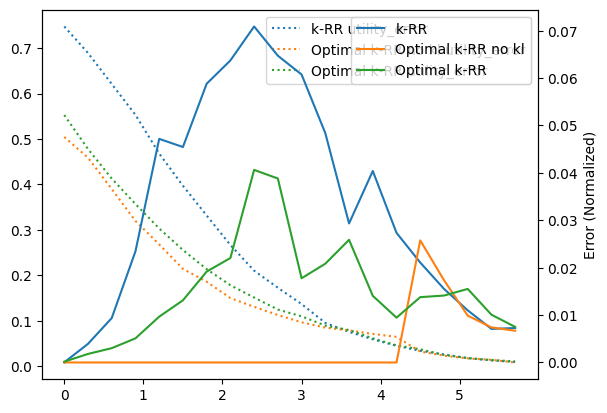

In [8]:
exponential_mechanism_without_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=True)

exponential_mechanism_with_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=False)

random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.0001)

optimal_random_response_mechanism_no_kl = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = False, ALPHA=0.01)


# mechanisms_dict = {"Exp. mechanism without prior": exponential_mechanism_without_prior, "Exp. mechanism with prior": exponential_mechanism_with_prior, "k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
# mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism, "Optimal k-RR without kl": optimal_random_response_mechanism_no_kl}
mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR no kl": optimal_random_response_mechanism_no_kl, "Optimal k-RR": optimal_random_response_mechanism} #, "k-RR": random_response_mechanism}
error_dict = {}
mi_dict = {}
total_mi_dict = {}

for key in list(mechanisms_dict.keys()):
    error_dict[key] = []
    mi_dict[key] = []
    total_mi_dict[key] = []

for eps in EPS_ARRAY:
    for mechanism in list(mechanisms_dict.keys()):
        __tot_error = 0
        __perturbed_value_list = []
        for entry in correlated_synthetic_dataset:
            # entry = entry_np_value[0]
            __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])

            # print(entry,__perturbed_value_list[-1])
            __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
            __tot_error += __error
        error_dict[mechanism].append(__tot_error/len(uniform_synthetic_dataset))
        # mi_dict[mechanism].append(mutual_info_pair(correlated_synthetic_dataset, __perturbed_value_list))
        # total_mi_dict[mechanism].append(total_info_leakage(correlated_synthetic_dataset, __perturbed_value_list, ))
        mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))

        # if mechanism == "Optimal k-RR":
        #     optimal_mechanism = mechanisms_dict[mechanism].get_mechanism(eps=eps)
            
        #     posterior_prob_distribution = np.zeros(TOTAL_STATES)
        #     posterior_joint_prob = np.zeros((TOTAL_STATES, TOTAL_STATES))
        #     for i in range(TOTAL_STATES):
        #         posterior_joint_prob[:,i] = np.reshape(optimal_mechanism[:,i] * np.array(random_dist), (4,))
        #         posterior_prob_distribution[i] = np.sum(optimal_mechanism[:,i] * np.array(random_dist))
            # print("posterior_prob_distribution ", posterior_prob_distribution)
            # print("Distance ", np.linalg.norm((random_dist-posterior_prob_distribution), 2))
            # sns.heatmap(optimal_mechanism)
            # plt.show()
lagends1 = []
lagends2 = []
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for mechanism in list(mechanisms_dict.keys()):
    lagends1.append(mechanism + " utility_error")
    ax1.plot(EPS_ARRAY, error_dict[mechanism], linestyle=":")
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    for mi_ in range(len(mi_dict[mechanism][0])):
        ax2.plot(EPS_ARRAY, np.array(mi_dict[mechanism])[:,mi_])
        lagends2.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

ax1.legend(lagends1)
ax2.legend(lagends2)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

In [9]:
import numpy as np

# Define your matrix and vector
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Example matrix
vector = np.array([1, 2, 3])  # Example vector

# Reshape vector for broadcasting and multiply
result = matrix * vector[:, np.newaxis]

print(result)


[[ 1  2  3]
 [ 8 10 12]
 [21 24 27]]


0.0


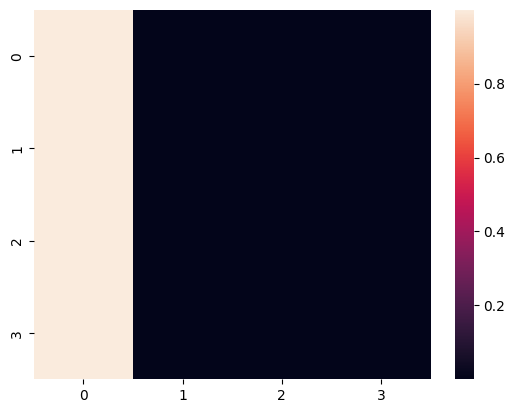

0.3


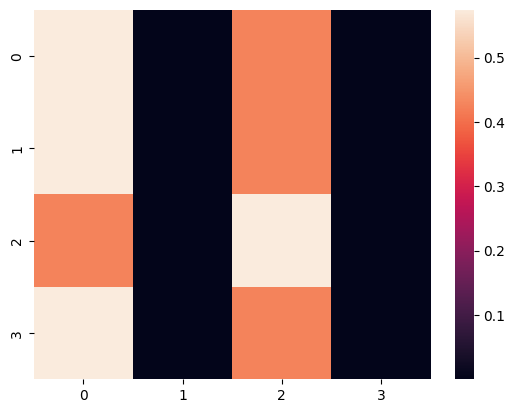

0.6


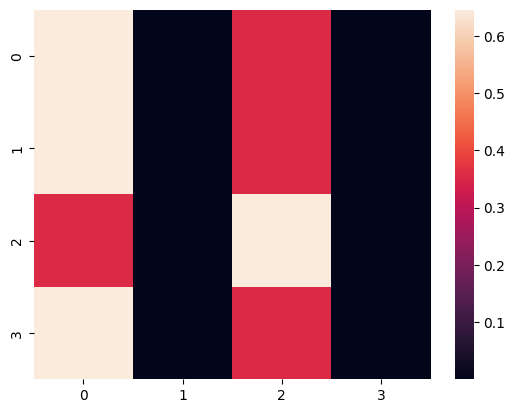

0.8999999999999999


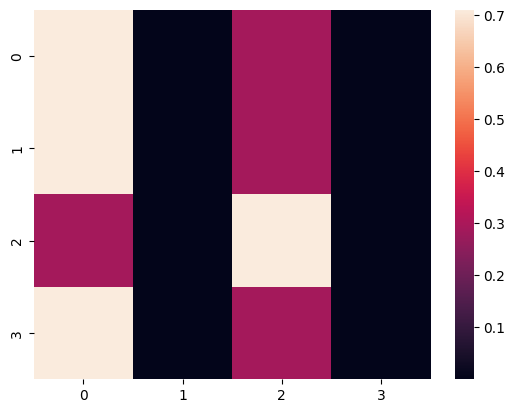

1.2


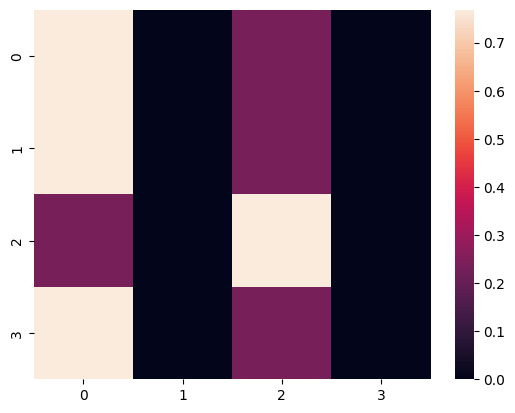

1.5


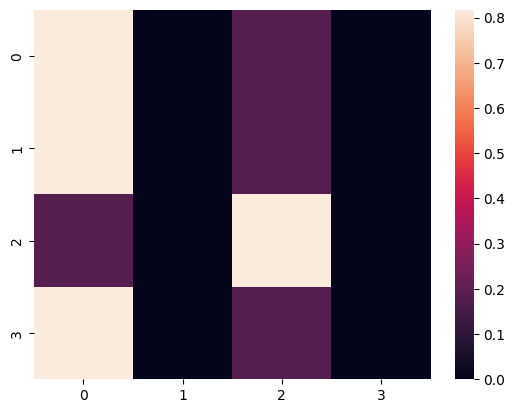

1.7999999999999998


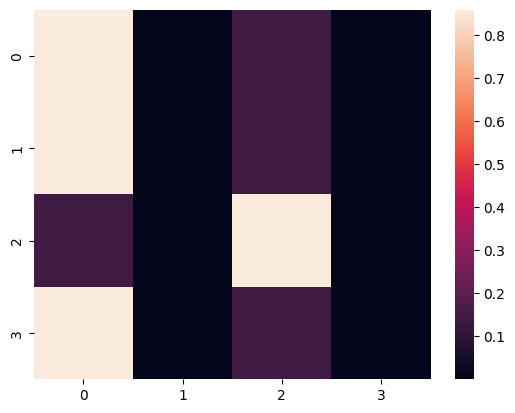

2.1


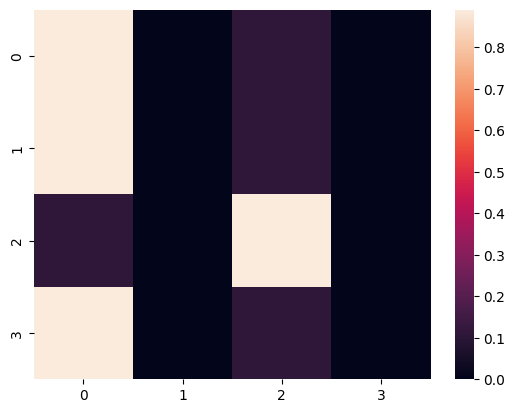

2.4


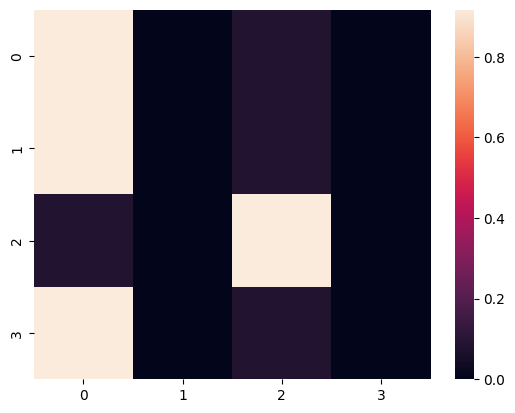

2.6999999999999997


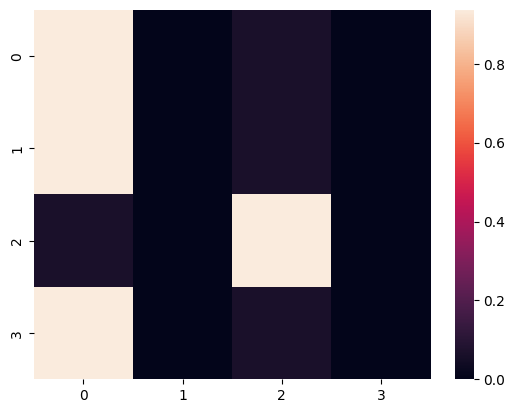

3.0


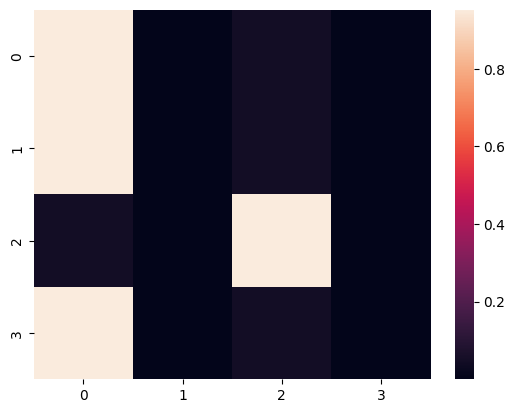

3.3


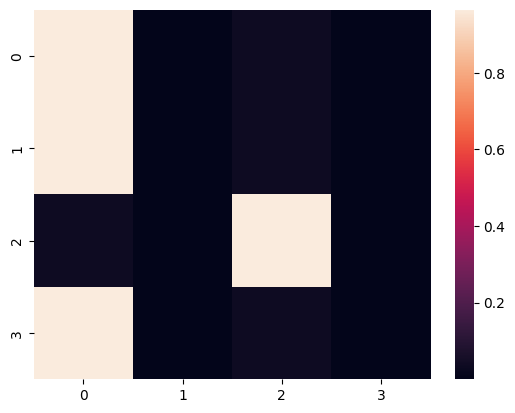

3.5999999999999996


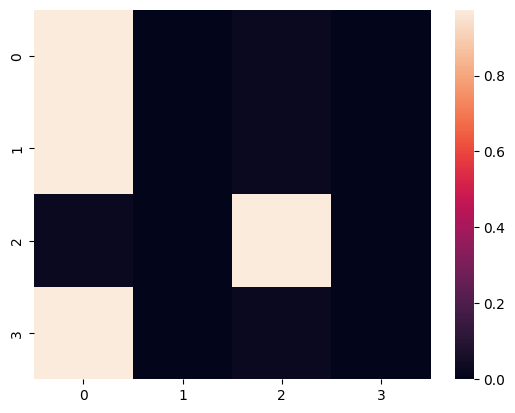

3.9


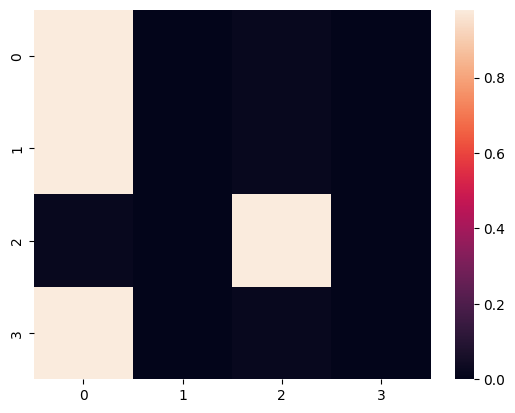

4.2


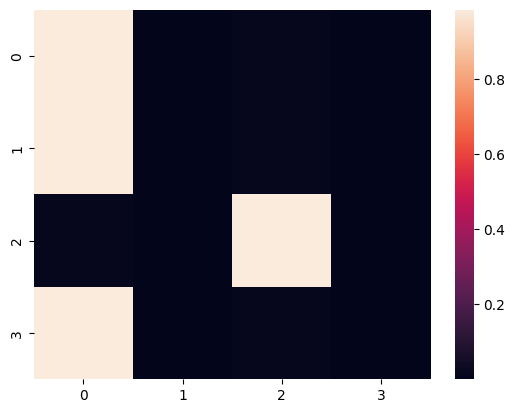

4.5


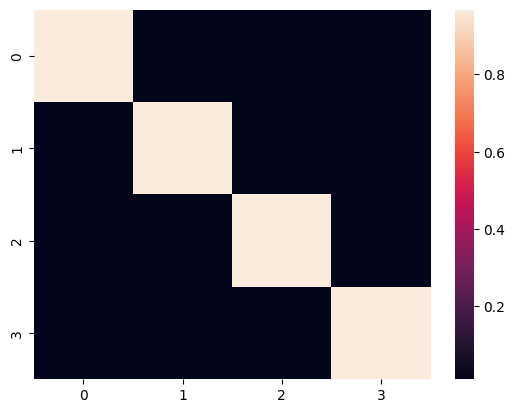

4.8


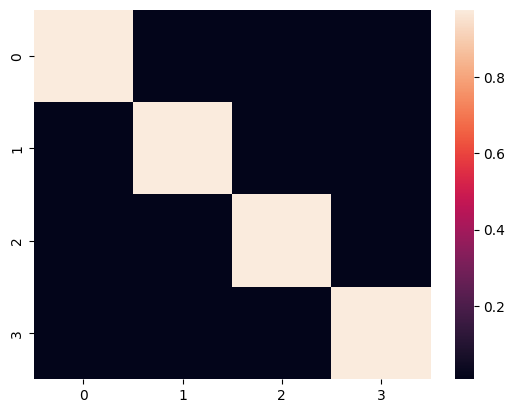

5.1


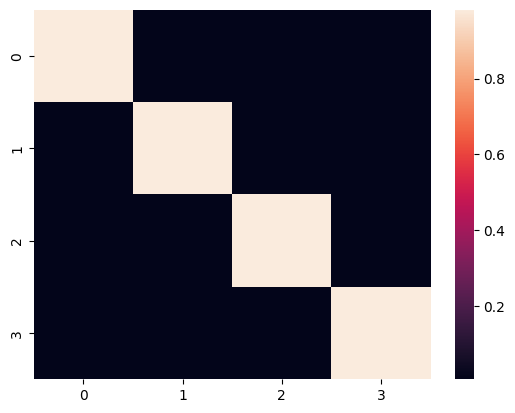

5.3999999999999995


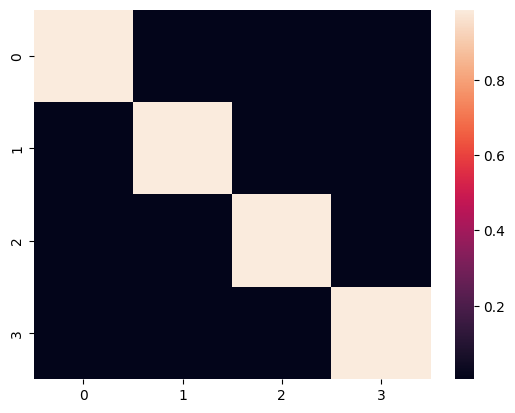

5.7


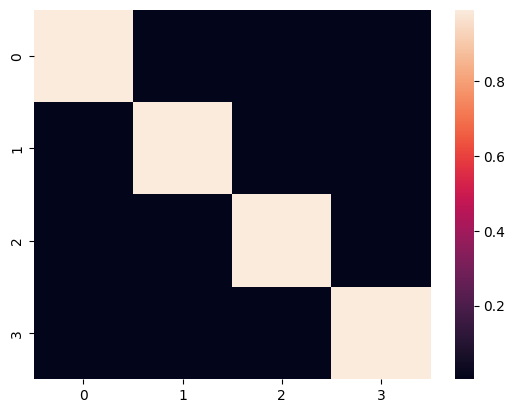

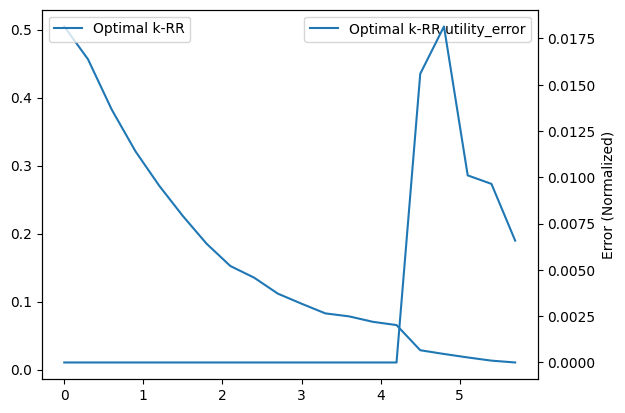

In [10]:
exponential_mechanism_without_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=True)

exponential_mechanism_with_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=False)

random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.0001)

optimal_random_response_mechanism_no_kl = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = False, ALPHA=0.01)


# mechanisms_dict = {"Exp. mechanism without prior": exponential_mechanism_without_prior, "Exp. mechanism with prior": exponential_mechanism_with_prior, "k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
# mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism, "Optimal k-RR without kl": optimal_random_response_mechanism_no_kl}
mechanisms_dict = {"Optimal k-RR": optimal_random_response_mechanism_no_kl} #, "k-RR": random_response_mechanism}
error_dict = {}
mi_dict = {}
total_mi_dict = {}

for key in list(mechanisms_dict.keys()):
    error_dict[key] = []
    mi_dict[key] = []
    total_mi_dict[key] = []

for eps in EPS_ARRAY:
    for mechanism in list(mechanisms_dict.keys()):
        __tot_error = 0
        __perturbed_value_list = []
        for entry in correlated_synthetic_dataset:
            # entry = entry_np_value[0]
            __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])

            # print(entry,__perturbed_value_list[-1])
            __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
            __tot_error += __error
        error_dict[mechanism].append(__tot_error/len(uniform_synthetic_dataset))
        # mi_dict[mechanism].append(mutual_info_pair(correlated_synthetic_dataset, __perturbed_value_list))
        # total_mi_dict[mechanism].append(total_info_leakage(correlated_synthetic_dataset, __perturbed_value_list, ))
        mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))

        if mechanism == "Optimal k-RR":
            optimal_mechanism = mechanisms_dict[mechanism].get_mechanism(eps=eps)
            
        #     posterior_prob_distribution = np.zeros(TOTAL_STATES)
        #     posterior_joint_prob = np.zeros((TOTAL_STATES, TOTAL_STATES))
        #     for i in range(TOTAL_STATES):
        #         posterior_joint_prob[:,i] = np.reshape(optimal_mechanism[:,i] * np.array(random_dist), (4,))
        #         posterior_prob_distribution[i] = np.sum(optimal_mechanism[:,i] * np.array(random_dist))
            # print("posterior_prob_distribution ", posterior_prob_distribution)
            # print("Distance ", np.linalg.norm((random_dist-posterior_prob_distribution), 2))
            sns.heatmap(optimal_mechanism)
            plt.show()
lagends1 = []
lagends2 = []
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for mechanism in list(mechanisms_dict.keys()):
    lagends1.append(mechanism + " utility_error")
    ax1.plot(EPS_ARRAY, error_dict[mechanism])
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    for mi_ in range(len(mi_dict[mechanism][0])):
        ax2.plot(EPS_ARRAY, np.array(mi_dict[mechanism])[:,mi_])
        lagends2.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

ax1.legend(lagends1)
ax2.legend(lagends2)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

In [11]:
import numpy as np

# Define a vector
v = np.array([1, 2, 3])  # Example vector

# Create a matrix by copying vector v into each column
matrix = np.tile(v[:, np.newaxis], (1, 3))  # Copy v into 3 columns

print(np.shape(matrix))


(3, 3)


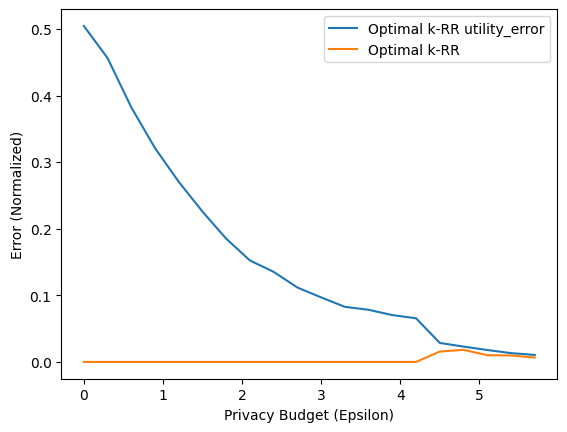

In [12]:
lagends1 = []
lagends2 = []
fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
for mechanism in list(mechanisms_dict.keys()):
    lagends1.append(mechanism + " utility_error")
    ax1.plot(EPS_ARRAY, error_dict[mechanism])
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    for mi_ in range(len(mi_dict[mechanism][0])):
        ax1.plot(EPS_ARRAY, np.array(mi_dict[mechanism])[:,mi_])
        lagends1.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

ax1.legend(lagends1)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

## Uniform Distribution

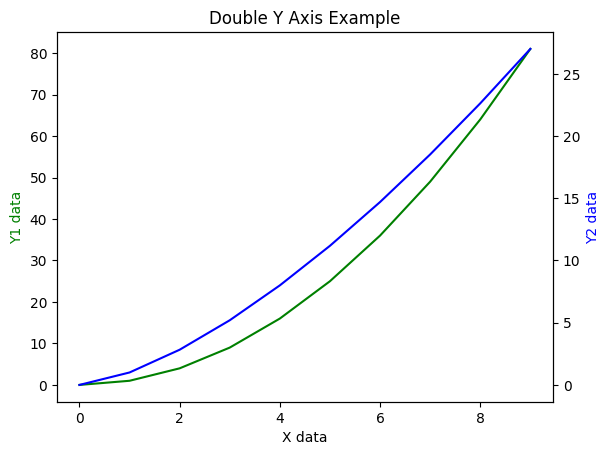

In [13]:
import matplotlib.pyplot as plt

# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot data on first axis
x = range(10)
y1 = [i**2 for i in x]
ax1.plot(x, y1, 'g-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

# Create second axis
ax2 = ax1.twinx()

# Plot data on second axis
y2 = [i**1.5 for i in x]
ax2.plot(x, y2, 'b-')
ax2.set_ylabel('Y2 data', color='b')

# Show plot
plt.title('Double Y Axis Example')
plt.show()


In [14]:
import numpy as np
import hashlib

class Rappor:
    def __init__(self, num_attributes, num_states, bloom_size, num_hashes):
        self.num_attributes = num_attributes
        self.num_states = num_states
        self.bloom_size = bloom_size
        self.num_hashes = num_hashes

    def _hash(self, item, seed):
        hash_object = hashlib.sha256()
        hash_object.update(str(item).encode('utf-8') + str(seed).encode('utf-8'))
        return int(hash_object.hexdigest(), 16) % self.bloom_size

    def bloom_filter(self, data):
        bloom = np.zeros((self.num_attributes, self.bloom_size))
        for i in range(self.num_attributes):
            for seed in range(self.num_hashes):
                index = self._hash((i, data[i]), seed)
                bloom[i, index] = 1
        return bloom

    def randomized_response(self, bloom, p=0.5):
        noisy_bloom = np.copy(bloom)
        for i in range(self.num_attributes):
            for j in range(self.bloom_size):
                if np.random.rand() < p:
                    noisy_bloom[i, j] = 1 - noisy_bloom[i, j]
        return noisy_bloom

    def collect_data(self, data):
        bloom = self.bloom_filter(data)
        noisy_bloom = self.randomized_response(bloom)
        return noisy_bloom

# Example usage
num_attributes = 2  # 3 attributes
num_states = 4      # 3 states for each attribute
bloom_size = 150     # Size of the Bloom filter
num_hashes = 2      # Number of hash functions

rappor = Rappor(num_attributes, num_states, bloom_size, num_hashes)

# Example data (each attribute can have a state from 0 to 2)
data = [1, 0, 2]
noisy_data = rappor.collect_data(data)
print(noisy_data)


[[0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
  1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
  0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
  0. 1. 0. 1. 1. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
  0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
  0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
  1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.
  0. 1. 0. 0. 0. 1.]]


In [15]:
import math

n = 16  # Number of elements
p = 0.01  # False positive probability

# Calculate the size of the Bloom filter
m = - (n * math.log(p)) / (math.log(2)**2)
m = math.ceil(m)  # Round up to the nearest whole number

# Calculate the number of hash functions
k = (m/n) * math.log(2)
k = math.ceil(k)  # Round up to the nearest whole number

print(f"Optimal Bloom filter size: {m} bits")
print(f"Optimal number of hash functions: {k}")


Optimal Bloom filter size: 154 bits
Optimal number of hash functions: 7


In [16]:
!pip install rappor

ERROR: Could not find a version that satisfies the requirement rappor (from versions: none)
ERROR: No matching distribution found for rappor

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
